In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0    -1.031645
10    0.088636
20   -1.445315
30   -3.250210
40   -2.516515
50   -3.086136
60   -4.052536
70   -4.384850
80   -3.712003
90   -4.607314
dtype: float64

<AxesSubplot:>

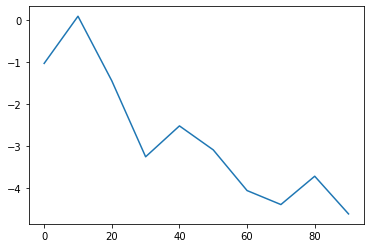

In [20]:
s.plot()

<AxesSubplot:>

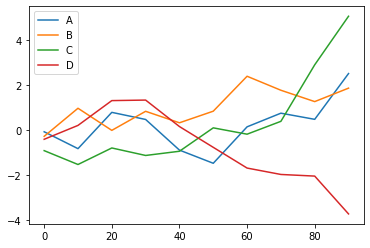

In [3]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
columns=['A', 'B', 'C', 'D'],
index=np.arange(0, 100, 10))
df.plot()

<AxesSubplot:>

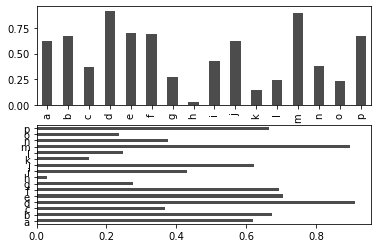

In [4]:
#Bar plots
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [14]:
df = pd.DataFrame(np.random.rand(6, 4),
index=['one', 'two', 'three', 'four', 'five', 'six'],
columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.400910,0.885950,0.541210,0.905302
two,0.976592,0.761601,0.352595,0.331132
three,0.407531,0.620645,0.342750,0.663166
four,0.677779,0.384901,0.070101,0.518206
five,0.925883,0.823620,0.734155,0.258507
six,0.181641,0.486337,0.952085,0.503336


<AxesSubplot:>

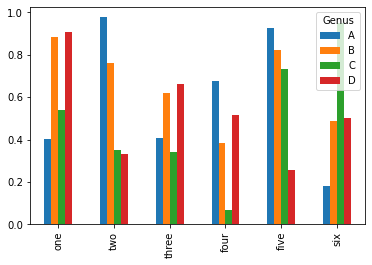

In [15]:
df.plot.bar()

<AxesSubplot:>

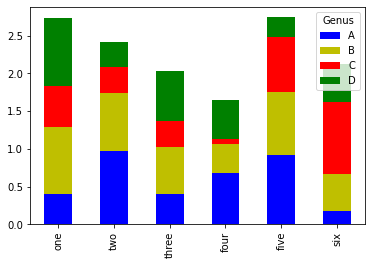

In [33]:
df.plot.bar(stacked=True,color=['b','y','r','g'])

<AxesSubplot:>

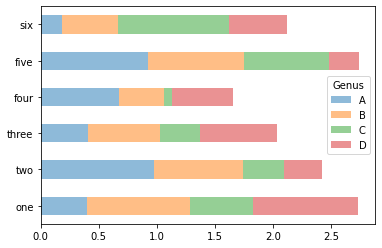

In [28]:
df.plot.barh(stacked=True, alpha=0.5)

In [7]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

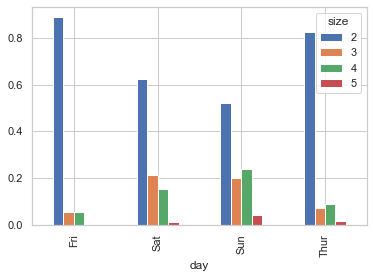

In [44]:
party_pcts.plot.bar()

In [8]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

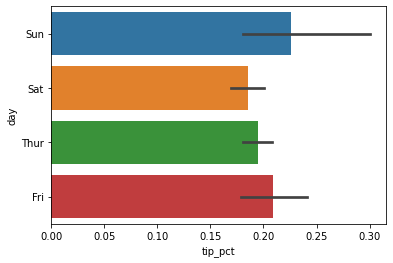

In [13]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

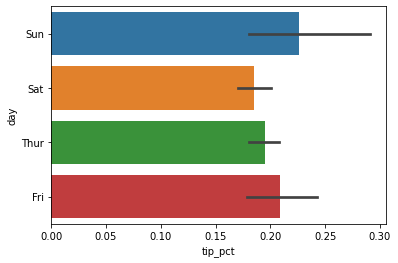

In [9]:
sns.barplot(x='tip_pct', y='day',data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

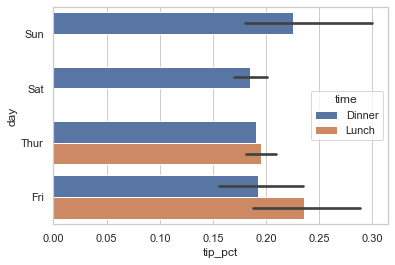

In [47]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

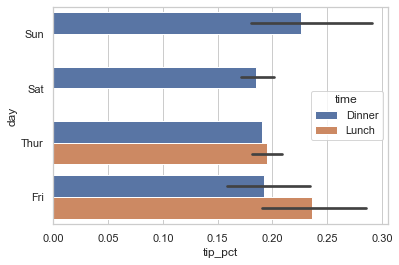

In [48]:
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:ylabel='Frequency'>

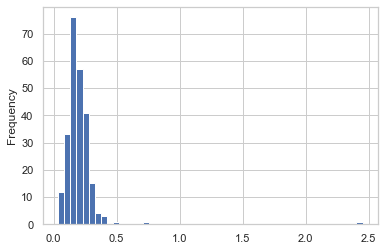

In [49]:
#histogram and density plot
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

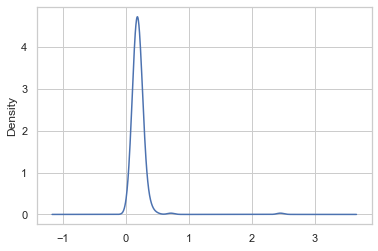

In [50]:
tips['tip_pct'].plot.density()

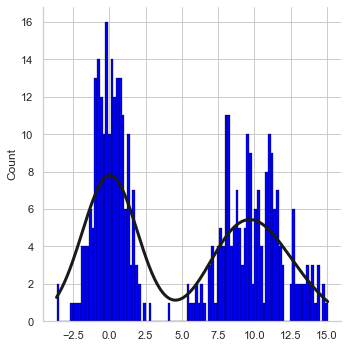

In [51]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k', facecolor = 'blue',
kde=True, line_kws={'lw':3}, edgecolor='black')

<AxesSubplot:ylabel='Count'>

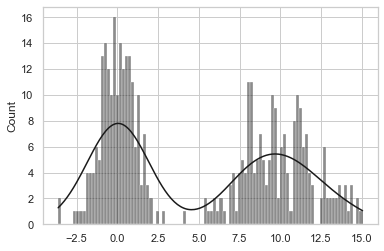

In [52]:
sns.histplot(values, bins=100, color='k', kde=True)

In [53]:
macro = pd.read_csv('../examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Users\Nitro\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m1', ylabel='unemp'>

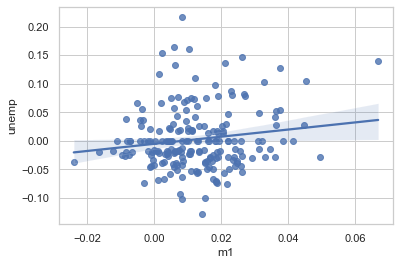

In [54]:
sns.regplot('m1', 'unemp', data=trans_data)

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

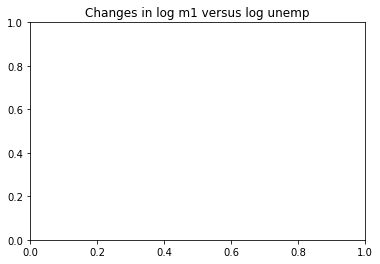

In [14]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

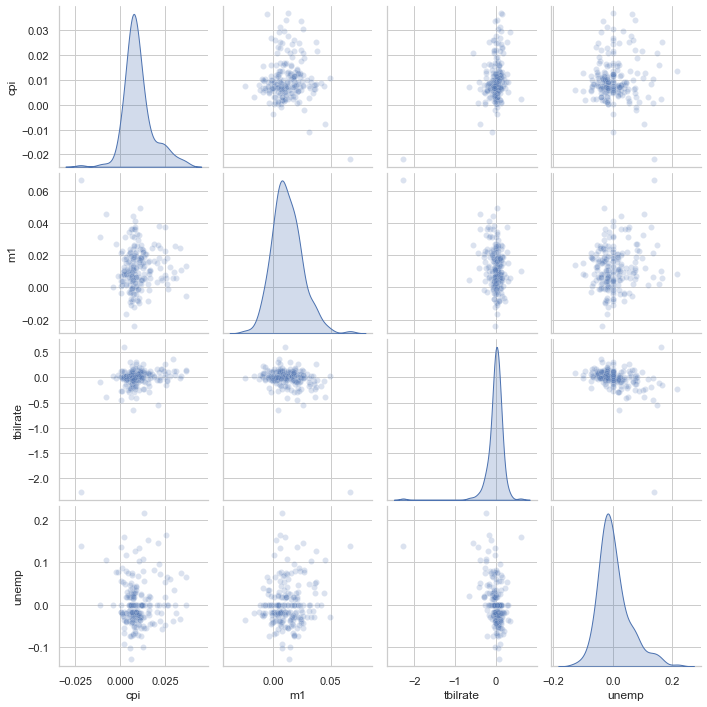

In [56]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

In [57]:
#Facet grids and categorical data

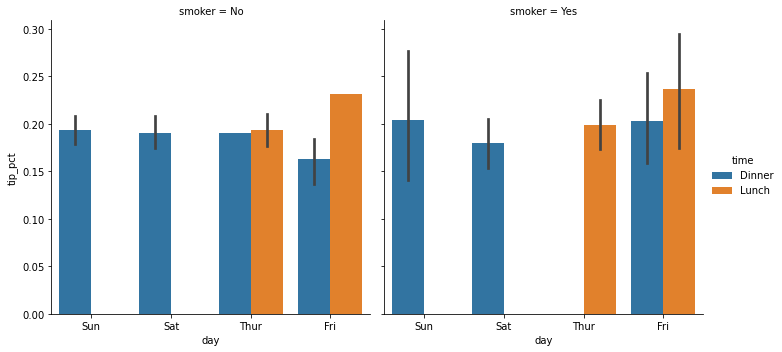

In [17]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
    kind='bar', data=tips[tips.tip_pct < 1])
    #original factorplot- changed name to catplot

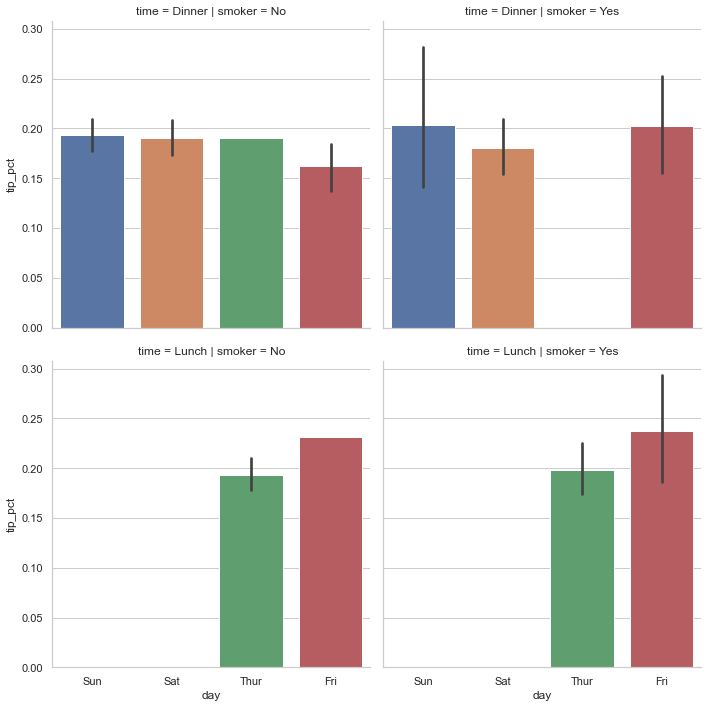

In [59]:
sns.catplot(x='day', y='tip_pct', row='time',
col='smoker',
kind='bar', data=tips[tips.tip_pct < 1])

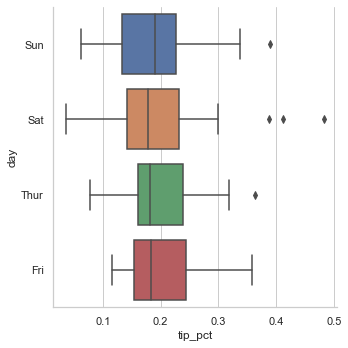

In [60]:
sns.catplot(x='tip_pct', y='day', kind='box',
data=tips[tips.tip_pct < 0.5])